In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [2]:
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *


jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', size=6)
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.major.size"] = 8
plt.rcParams['axes.edgecolor'] = '0.'
plt.rcParams['axes.labelcolor'] = '0.'
plt.rcParams['xtick.color'] = '0.'
plt.rcParams['ytick.color'] = '0.'
plt.rcParams['text.color'] = '0.'
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["xtick.minor.size"] = 6
plt.rcParams["ytick.minor.size"] = 6
plt.rcParams["xtick.major.width"] = 2
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams['axes.linewidth'] = 1.6
plt.rcParams['lines.linewidth'] = 4

In [3]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49, 'Cl2p' : 0.891,
            'Br3p' : 1.054, 'Br3d' : 1.054, 
            'Ru3d': 4.273, 'Ir4d': 1.84, 'P2p': 0.486, 'F1s': 1,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Si2p': 0.339})

# Analysis experiments on Ru/Ir fluorophores in qITO

## Read processed experiments

In [4]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/**/*.sxy'

files = glob.glob(path, recursive=True)
files.sort()
files.append('/Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/proc/20210427_ITO_APTES_thin.sxy')

files

['/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210415_1-qITO_clean.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI068-qITO_Ru++.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI069-qITO_APTES_Ru++.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210707_ITO_aDEA_EDI_079.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210708_AAN050_EDI076-qITO_APTES_Ir+.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210708_EDI081-qITO_AUTES_Ru++.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/proc/20210427_ITO_APTES_thin.sxy']

In [5]:
ru_exps = [read_processed_xp(f) for f in files]


[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210415_1-qITO_clean.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210707_ITO_aDEA_EDI_079.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210708_AAN050_EDI076-qITO_APTES_Ir+.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/proc/20210427_ITO_APTES_thin.sxy.ft', returning empty fit dict


In [561]:
names = ['1-qITO_clean', 'EDI068-qITO_Ru++', 'EDI069-qITO_APTES_Ru++', 'EDI079-qITO_APTES_decFBI-acid',
 'EDI076-AAN050-qITO_APTES_Ir+', 'EDI081-qITO_AUTES_Ru++', 'EDI060-qITO_APTES']
cols = ['b', 'y', 'r', 'g', 'y', 'm', 'k']
for xp, n, c in zip(ru_exps, names, cols):
    xp.name = n
    xp.color = c

In [530]:
ru_exps[6].name = 'EDI060-qITO_APTES'
ru_exps[6].color = 'k'

shift = find_shift(ru_exps[6], ru_exps[2], 'In3d')
align_dfx(ru_exps[6], shift, inplace=True);
ru_exps = scale_and_plot_spectra(ru_exps, region='In3d', flag_plot=False)

trim_spectra(ru_exps[6], ru_exps[2], 'N1s', inplace=True);
trim_spectra(ru_exps[6], ru_exps[2], 'O1s', inplace=True);

## Integrate areas 

'F1s' region does not exist in 1-qITO_clean
'F1s' region does not exist in EDI068-qITO_Ru++
'F1s' region does not exist in EDI079-qITO_APTES_decFBI-acid
'F1s' region does not exist in EDI060-qITO_APTES
'P2p' region does not exist in 1-qITO_clean
'P2p' region does not exist in EDI068-qITO_Ru++
'P2p' region does not exist in EDI079-qITO_APTES_decFBI-acid
'P2p' region does not exist in EDI060-qITO_APTES


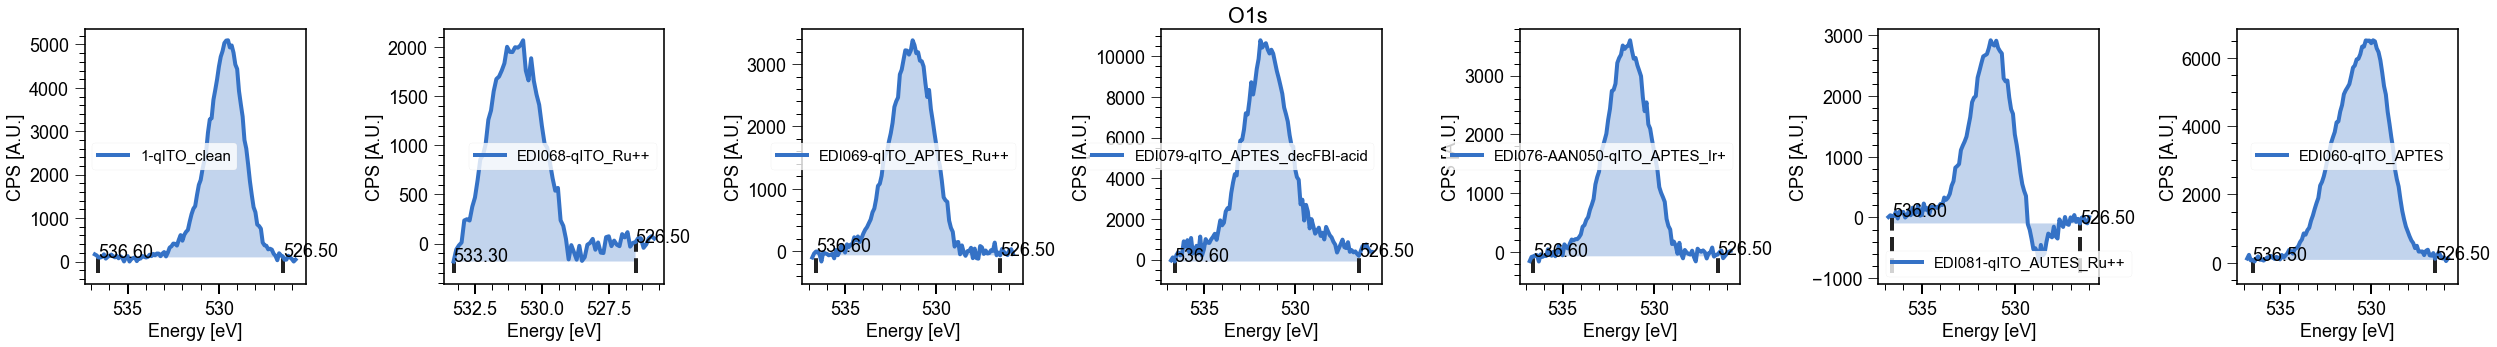

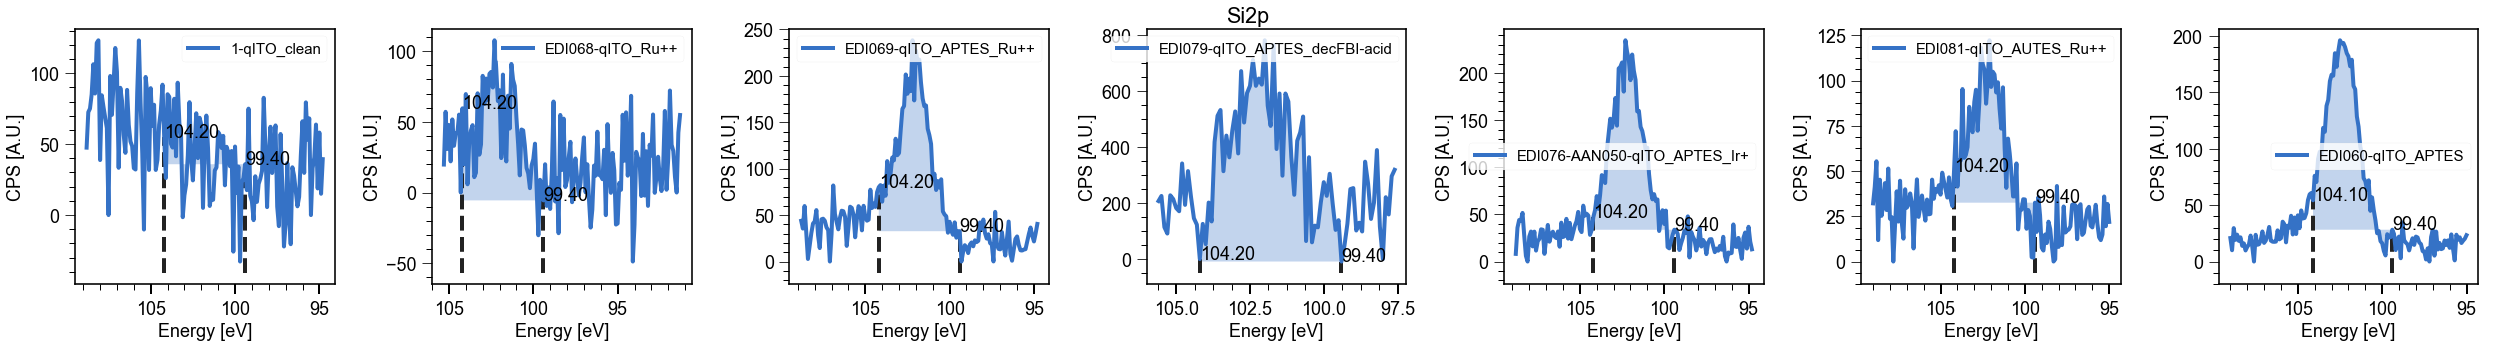

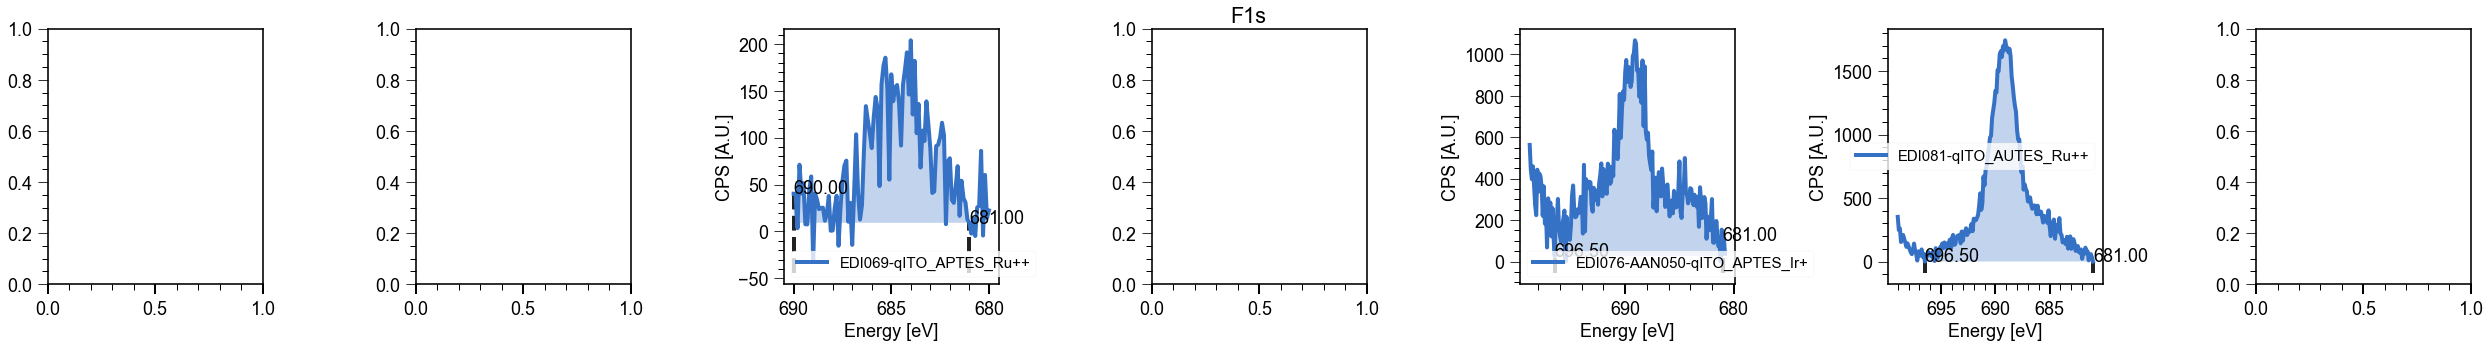

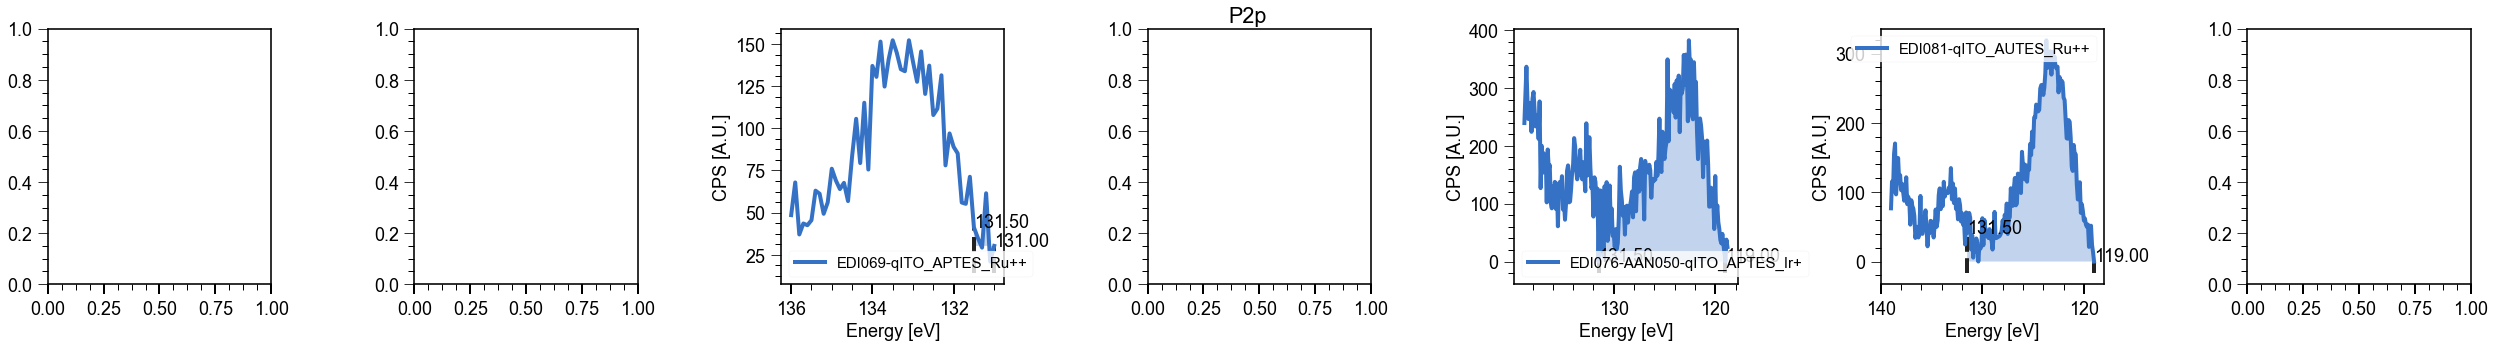

In [567]:
regions = ['O1s','Si2p', 'F1s', 'P2p']
for r in regions:
    integrateRegions(ru_exps, r, asf=asf)

[1243.2863340158601,
 14171.701390132368,
 1027.9266979378594,
 892.9397690397991,
 936.2174515678162]

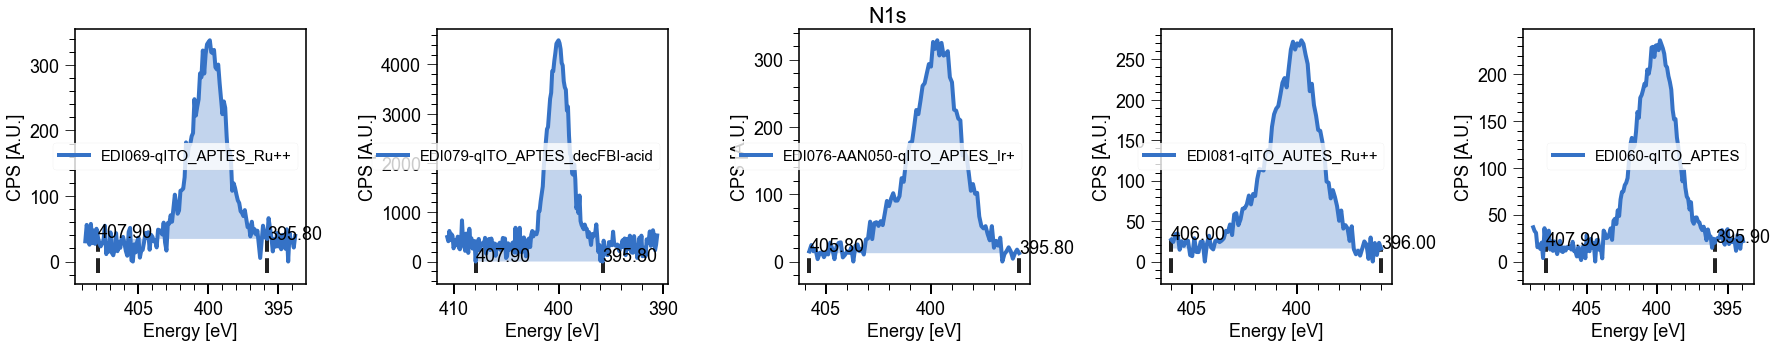

In [568]:
integrateRegions(ru_exps[2:], region='N1s', asf=asf)

[6115.464052328258, 6115.464052328258]

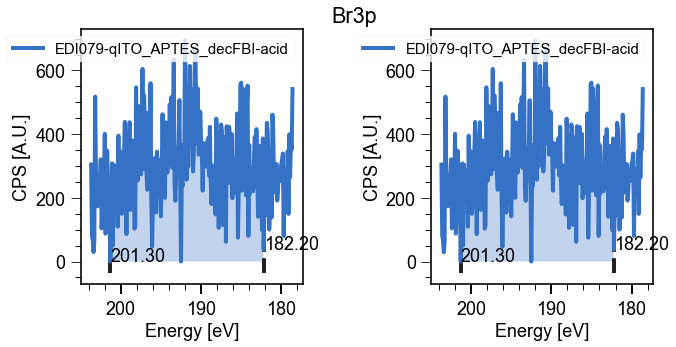

In [569]:
integrateRegions([ru_exps[3], ru_exps[3]], region='Br3p', asf=asf)

[55800.17881637842, 7877.062845538506, 4344.001233856764]

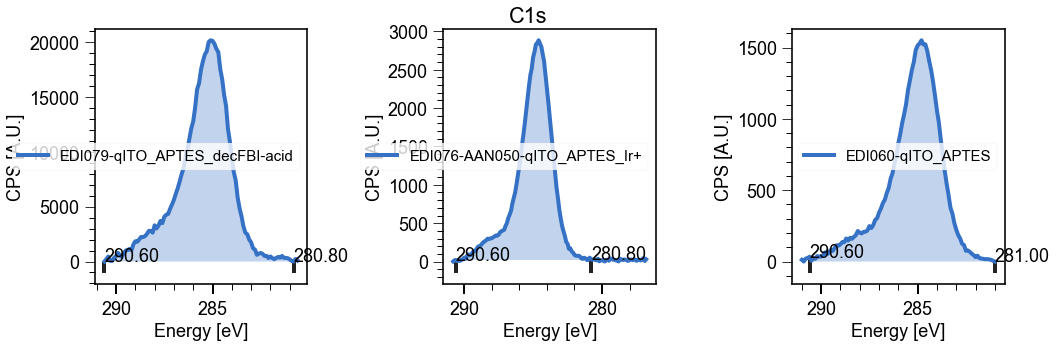

In [582]:
integrateRegions([ru_exps[3], ru_exps[4], ru_exps[6]], region='C1s', asf=asf)

[1376.2069032341872, 1376.2069032341872]

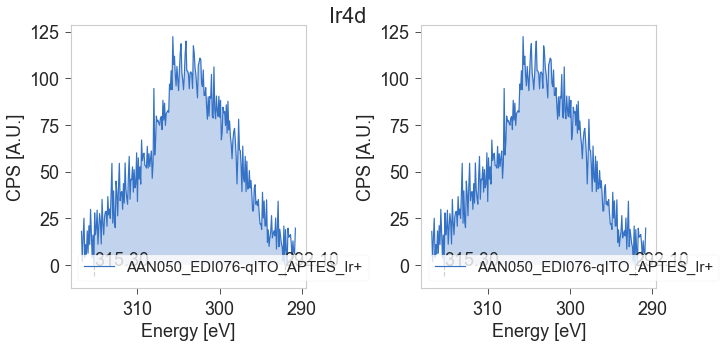

In [416]:
integrateRegions([ru_exps[4], ru_exps[4]], region='Ir4d', asf=asf)

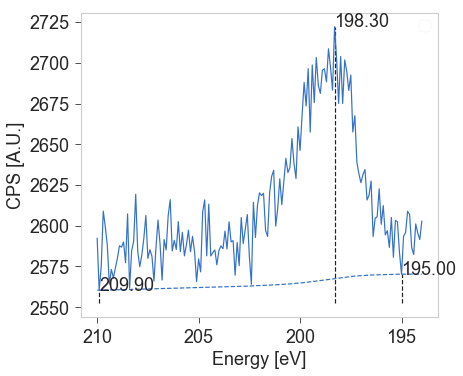

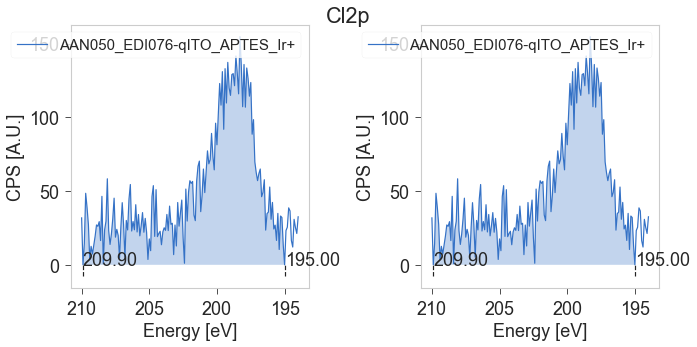

In [417]:
region =  'Cl2p'
xp = ru_exps[4]
crop_spectrum(xp, region, eup=210, edw=194, inplace=True);
xp = subtract_shirley_bg(xp, region)

integrateRegions([xp, xp], region='Cl2p', asf=asf)
ru_exps[4].area[region] = xp.area[region]

In [294]:
ru_exps[2].area

{'Ru3d': 98.45643988647592,
 'C1s': 14752.853085508752,
 'O1s': 13072.15427122975,
 'Si2p': 1636.675724266431,
 'F1s': 671.8242110215618,
 'P2p': 37.503250441337876,
 'N1s': 2606.4703019200424}

In [295]:
ru_exps[1].area['Ru3d']/ru_exps[2].area['Ru3d']

0.7261760360866079

In [296]:
ru_exps[1].area['Ru3d']/ru_exps[5].area['Ru3d']

0.8716434218059598

In [53]:
3/4

0.75

# Stoichiometry 

In [14]:
from IPython.display import HTML, display

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4><td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

In [397]:
def make_stoichometry_table(exps : list, num : list, denom : list, sep='\t'):
    """Print stoichiometry table of the experiments exps at the regions in num/denom
    Example: make_stoichometry_table(oxid_exps, 'N1s', 'C1s'], ['Br3p', 'O1s'])
    will print the stoichiometry N/C, Br/O for the passed experiments"""

    make_header(num = num, denom = denom)
#     print('Experiment, ' + )
    for k, xp in enumerate(exps):
        row = xp.name + sep
        for i, j in zip (num, denom):
            row += ('%.2f %s ' %(xp.area[i]/xp.area[j], sep))
        print(row )

In [580]:
def display_stoichiometry(exps: list, num: list, denom: list):
    head = ['Experiment']   # Make header
    for n, d in zip(num, denom):
        cln = re.search(r'\d+', n).span()[0]
        cld = re.search(r'\d+', d).span()[0]
        head.append(n[:cln] + '/' + d[:cld])
    data = [head]
    
    for k, xp in enumerate(exps):
        row = [xp.name]
        for i, j in zip (num, denom):
            row.append('%.2f' %(xp.area[i]/xp.area[j]) )
        data.append(row)
    display_table(data)

## APTES only

In [586]:
na = 2

area_ref_aptes = {'C1s':9, 'O1s': 3, 'N1s': 1, 'Si2p': 1}
stoi_aptes = XPS_experiment(name='Stoich_aptes', area = area_ref_aptes)

area_ref_raptes = {'C1s':3, 'O1s': 3, 'N1s': 1, 'Si2p': 1}
stoi_raptes = XPS_experiment(name='Stoich_linked-aptes', area = area_ref_raptes)

num, denom = (('N1s', 'C1s', 'C1s', 'O1s', 'O1s'), ('Si2p', 'Si2p', 'N1s', 'N1s', 'Si2p'))
display_stoichiometry([ru_exps[6],stoi_aptes, stoi_raptes],  num=num, denom=denom)

In [587]:
make_stoichometry_table([ru_exps[6],stoi_aptes, stoi_raptes],  num=num, denom=denom)

Experiment	N/Si	C/Si	C/N	O/N	O/Si	
EDI060-qITO_APTES	1.36 	 10.15 	 7.48 	 17.09 	 23.21 	 
Stoich_aptes	1.00 	 9.00 	 9.00 	 3.00 	 3.00 	 
Stoich_linked-aptes	1.00 	 3.00 	 3.00 	 3.00 	 3.00 	 


In [589]:
10.15/9

1.1277777777777778

## Ru++

### Ru(bpy)3 only

In [578]:
na = 2
stoi_ru = []

area_ref_ru = {'C1s':32, 'O1s': 4, 'N1s': 6, 'Ru3d': 1, 'P2p': 2, 'F1s': 12}
stoi_ru = XPS_experiment(name='Stoich_Ru(bpy)3++[PF6]-', area = area_ref_ru)

num, denom = (('N1s', 'C1s', 'C1s', 'O1s', 'O1s'), ('Ru3d', 'Ru3d', 'N1s', 'N1s', 'Ru3d'))
display_stoichiometry([ru_exps[1],stoi_ru],  num=num, denom=denom)

In [579]:
make_stoichometry_table([ru_exps[1],stoi_ru],  num=num, denom=denom)

Experiment	N/Ru	C/Ru	C/N	O/N	O/Ru	
EDI068-qITO_Ru++	8.24 	 154.95 	 18.80 	 10.86 	 89.49 	 
Stoich_Ru(bpy)3++[PF6]-	6.00 	 32.00 	 5.33 	 0.67 	 4.00 	 


In [436]:
ru_exps[5].name ='EDI081-qITO_AUTES_Ru++'

In [315]:
ru_exps[2].name

'EDI069-qITO_APTES_Ru++'

In [437]:
ru_exps[5].area['C1s'] / ru_exps[2].area['C1s']

1.0937856106829729

In [326]:
area_refru = {'C1s':32, 'O1s': 4, 'N1s': 6, 'Si2p': np.NaN, 'Ru3d': 1, 'P2p': 2, 'F1s': 12}
stoi_ru = XPS_experiment(name='Stoichiometry_Ru++', area = area_refru)

### Consider unreacted APTES (analyse C 1s in detail later)

In [472]:
na = 2
stoi_aptes_ru = []
for na in range(11, 20, 2):
    area_ref_aptes_ru = {'C1s':32 + na*9, 'O1s': 4 + na*3, 'N1s': 6+na, 'Si2p': na, 'Ru3d': 1, 'P2p': 2, 'F1s': 12}
    stoi_aptes_ru.append(XPS_experiment(name='Stoich_Ru++'+str(na)+'APTES', area = area_ref_aptes_ru))

num, denom = (('Si2p', 'N1s', 'N1s', 'C1s', 'C1s', 'C1s'), ('Ru3d', 'Ru3d', 'Si2p', 'N1s', 'Si2p', 'Ru3d'))
display_stoichiometry(ru_exps[1:3]+[ru_exps[5]]+stoi_aptes_ru,  num=num, denom=denom)

In [473]:
num, denom = (('Si2p', 'N1s', 'N1s', 'C1s', 'C1s', 'C1s'), ('Ru3d', 'Ru3d', 'Si2p', 'N1s', 'Si2p', 'Ru3d'))
make_stoichometry_table(ru_exps[1:3]+[ru_exps[5]]+stoi_aptes_ru,  num=num, denom=denom)

Experiment	Si/Ru	N/Ru	N/Si	C/N	C/Si	C/Ru	
EDI068-qITO_Ru++	8.72 	 8.24 	 0.95 	 18.80 	 17.77 	 154.95 	 
EDI069-qITO_APTES_Ru++	16.62 	 26.47 	 1.59 	 5.66 	 9.01 	 149.84 	 
EDI081-qITO_AUTES_Ru++	11.27 	 22.82 	 2.02 	 8.62 	 17.45 	 196.73 	 
Stoich_Ru++11APTES	11.00 	 17.00 	 1.55 	 7.71 	 11.91 	 131.00 	 
Stoich_Ru++13APTES	13.00 	 19.00 	 1.46 	 7.84 	 11.46 	 149.00 	 
Stoich_Ru++15APTES	15.00 	 21.00 	 1.40 	 7.95 	 11.13 	 167.00 	 
Stoich_Ru++17APTES	17.00 	 23.00 	 1.35 	 8.04 	 10.88 	 185.00 	 
Stoich_Ru++19APTES	19.00 	 25.00 	 1.32 	 8.12 	 10.68 	 203.00 	 


In [478]:
npf = 2
na = 17
stoi_pf_ru = []
for npf in range(1, 12, 2):
    area_ref_pf_ru = {'C1s':32 + na*9, 'O1s': 4 + na*3, 'N1s': 6+na, 'Si2p': na, 'Ru3d': 1, 'P2p': 2 *npf, 'F1s': 12 * npf}
    stoi_pf_ru.append(XPS_experiment(name='17 AUTES Ru++ '+str(npf)+'PF6', area = area_ref_pf_ru))

num, denom = (('F1s', 'F1s', 'F1s', 'F1s'), ('Ru3d', 'Si2p', 'N1s', 'C1s'))
display_stoichiometry([ru_exps[5]]+stoi_pf_ru,  num=num, denom=denom)

In [479]:
num, denom = (('F1s', 'F1s', 'F1s', 'F1s'), ('Ru3d', 'Si2p', 'N1s', 'C1s'))
make_stoichometry_table([ru_exps[5]]+stoi_pf_ru,  num=num, denom=denom)

Experiment	F/Ru	F/Si	F/N	F/C	
EDI081-qITO_AUTES_Ru++	87.83 	 7.79 	 3.85 	 0.45 	 
17 AUTES Ru++ 1PF6	12.00 	 0.71 	 0.52 	 0.06 	 
17 AUTES Ru++ 3PF6	36.00 	 2.12 	 1.57 	 0.19 	 
17 AUTES Ru++ 5PF6	60.00 	 3.53 	 2.61 	 0.32 	 
17 AUTES Ru++ 7PF6	84.00 	 4.94 	 3.65 	 0.45 	 
17 AUTES Ru++ 9PF6	108.00 	 6.35 	 4.70 	 0.58 	 
17 AUTES Ru++ 11PF6	132.00 	 7.76 	 5.74 	 0.71 	 


### Un-anchored APTES: $C_9H_{23}NO_3Si$

### Anchored APTES: $C_3H_{8}NO_3Si$

In [485]:
na = 2
stoi_aptes_ru = []
for na in range(17, 19, 2):
    area_ref_aptes_ru = {'C1s':32 + na*9, 'O1s': 4 + na*3, 'N1s': 6+na, 'Si2p': na, 'Ru3d': 1, 'P2p': 2, 'F1s': 12}
    stoi_aptes_ru.append(XPS_experiment(name='Stoich_Ru++'+str(na)+'APTES', area = area_ref_aptes_ru))

num, denom = (('C1s', 'C1s', 'C1s', 'F1s'), ('Si2p', 'Ru3d', 'N1s', 'C1s'))
display_stoichiometry([ru_exps[2]]+stoi_aptes_ru,  num=num, denom=denom)

In [486]:
na = 2
stoi_raptes_ru = []
for na in range(17, 19, 2):
    area_ref_raptes_ru = {'C1s':32 + na*3, 'O1s': 4 + na*3, 'N1s': 6+na, 'Si2p': na, 'Ru3d': 1, 'P2p': 2, 'F1s': 12}
    stoi_raptes_ru.append(XPS_experiment(name='Stoich_Ru++'+str(na)+'-r-APTES', area = area_ref_raptes_ru))

num, denom = (('C1s', 'C1s', 'C1s', 'F1s'), ('Si2p', 'Ru3d', 'N1s', 'C1s'))
display_stoichiometry([ru_exps[2]]+stoi_raptes_ru,  num=num, denom=denom)

In [487]:
make_stoichometry_table([ru_exps[2]]+stoi_aptes_ru,  num=num, denom=denom)

Experiment	C/Si	C/Ru	C/N	F/C	
EDI069-qITO_APTES_Ru++	9.01 	 149.84 	 5.66 	 0.05 	 
Stoich_Ru++17APTES	10.88 	 185.00 	 8.04 	 0.06 	 


In [488]:
make_stoichometry_table([ru_exps[2]]+stoi_raptes_ru,  num=num, denom=denom)

Experiment	C/Si	C/Ru	C/N	F/C	
EDI069-qITO_APTES_Ru++	9.01 	 149.84 	 5.66 	 0.05 	 
Stoich_Ru++17-r-APTES	4.88 	 83.00 	 3.61 	 0.14 	 


### Unanchored AUTES: $C_{17}H_{39}NO_3Si$


### Anchored AUTES: $C_{11}H_{24}NO_3Si$


In [491]:
na = 2
stoi_autes_ru = []
for na in range(11, 13, 2):
    area_ref_autes_ru = {'C1s':32 + na*17, 'O1s': 4 + na*3, 'N1s': 6+na, 'Si2p': na, 'Ru3d': 1, 'P2p': 2 * npf, 'F1s': 12 * npf}
    stoi_autes_ru.append(XPS_experiment(name='Stoich_Ru++'+str(na)+'AUTES', area = area_ref_autes_ru))

num, denom = (('C1s', 'C1s', 'C1s', 'F1s'), ('Si2p', 'Ru3d', 'N1s', 'C1s'))
display_stoichiometry([ru_exps[5]]+stoi_autes_ru,  num=num, denom=denom)

In [495]:
na = 2
stoi_rautes_ru = []
for na in range(11, 13, 2):
    area_ref_rautes_ru = {'C1s':32 + na*11, 'O1s': 4 + na*3, 'N1s': 6+na, 'Si2p': na, 'Ru3d': 1, 'P2p': 2 * npf, 'F1s': 12 * npf}
    stoi_rautes_ru.append(XPS_experiment(name='Stoich_Ru++'+str(na)+'-r-AUTES', area = area_ref_rautes_ru))
    
    num, denom = (('C1s', 'C1s', 'C1s', 'F1s'), ('Si2p', 'Ru3d', 'N1s', 'C1s'))
display_stoichiometry([ru_exps[5]]+stoi_rautes_ru,  num=num, denom=denom)

In [493]:
make_stoichometry_table([ru_exps[5]]+stoi_autes_ru,  num=num, denom=denom)

Experiment	C/Si	C/Ru	C/N	F/C	
EDI081-qITO_AUTES_Ru++	17.45 	 196.73 	 8.62 	 0.45 	 
Stoich_Ru++11AUTES	19.91 	 219.00 	 12.88 	 0.60 	 


In [496]:
make_stoichometry_table([ru_exps[5]]+stoi_rautes_ru,  num=num, denom=denom)

Experiment	C/Si	C/Ru	C/N	F/C	
EDI081-qITO_AUTES_Ru++	17.45 	 196.73 	 8.62 	 0.45 	 
Stoich_Ru++11-r-AUTES	13.91 	 153.00 	 9.00 	 0.86 	 


## Ir+, AAN050

In [506]:
stoi_aptes = []
area_ref_aptes = {'C1s':9, 'O1s': 3, 'N1s': 1, 'Si2p': 1, 'Ir4d' : np.NaN, 'Cl2p' : np.NaN, 'F1s': np.NaN}
stoi_aptes = XPS_experiment(name='Stoich APTES', area = area_ref_aptes)

stoi_aptes_ir = []
for na in range(2, 4, 2):
    area_ref_aptes_ir = {'C1s':34 + na*9, 'O1s': 4 + na*3, 'N1s': 4+na, 'Si2p': na, 'Ir4d': 1, 'Cl2p': 1, 'F1s': 12*na}
    stoi_aptes_ir.append(XPS_experiment(name='Stoich_Ir+'+str(na)+'APTES', area = area_ref_aptes_ir))

num, denom = (('Si2p', 'Ir4d', 'Si2p', 'N1s', 'N1s', 'C1s', 'C1s', 'O1s'), ('Ir4d', 'Cl2p', 'Cl2p', 'Ir4d', 'Si2p', 'N1s', 'Si2p', 'N1s'))
display_stoichiometry([ru_exps[4], stoi_aptes]+stoi_aptes_ir,  num=num, denom=denom)

In [504]:
make_stoichometry_table([ru_exps[4], stoi_aptes]+stoi_aptes_ir,  num=num, denom=denom)

Experiment	Si/Ir	Ir/Cl	Si/Cl	N/Ir	N/Si	C/N	C/Si	
AAN050_EDI076-qITO_APTES_Ir+	2.19 	 0.89 	 1.94 	 2.88 	 1.31 	 12.35 	 16.22 	 
Stoich APTES	nan 	 nan 	 nan 	 nan 	 1.00 	 9.00 	 9.00 	 
Stoich_Ir+2APTES	2.00 	 1.00 	 2.00 	 6.00 	 3.00 	 8.67 	 26.00 	 


In [98]:
num, denom = (('C1s', 'C1s', 'O1s', 'N1s', 'N1s'), ('O1s', 'N1s', 'N1s', 'Si2p', 'Ru3d'))
make_stoichometry_table(ru_exps[1:3],  num=num, denom=denom, sep=' \t ')

Experiment	C/O	C/N	O/N	N/Si	N/Ru	
EDI068-qITO_Ru++ 	 0.03  	  2.15  	  62.88  	  0.50  	  5.37  	  
EDI069-qITO_APTES_Ru++ 	 0.04  	  0.44  	  12.18  	  1.13  	  26.16  	  


In [97]:
num, denom = (('N1s', 'F1s', 'P2p', 'F1s'), ('Ru3d', 'N1s', 'N1s', 'P2p'))
make_stoichometry_table([ru_exps[2], ru_exps[2]],  num=num, denom=denom, sep=' \t ')

Experiment	N/Ru	F/N	P/N	F/P	
EDI069-qITO_APTES_Ru++ 	 26.16  	  0.25  	  8.27  	  0.03  	  
EDI069-qITO_APTES_Ru++ 	 26.16  	  0.25  	  8.27  	  0.03  	  


In [38]:
print('APTES')
## [C9H23NO3Si]
print('C/O \tC/N \t O/N \t Si/N ')
print('%.3f'%(9/3), '\t', '%.3f'%(9/1), '\t', '%.3f' %(3/1), '\t %.3f' %(1/1))

APTES
C/O 	C/N 	 O/N 	 Si/N 
3.000 	 9.000 	 3.000 	 1.000


## DEA

In [96]:
reffile = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201104_ITO_DEA_ZTF594_PN1_F1.xy'
xpr = read_processed_xp(reffile)

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/Zoraida_Hank/SDEA/proc/20201104_ITO_DEA_ZTF594_PN1_F1.xy.ft', returning empty fit dict


In [218]:
def manual_limit_noise(xp: XPS_experiment, region: str, eup: float, edw: float,
                       ydw: float, yup: float, inplace: bool = True):
    """Limit noise within an energy range [eup, edw] and a count range [ydw, yup]"""
    assert edw < eup, "Enter edw < eup"
    assert ydw < yup, "Enter ydw < yup"
    
    df = xp.dfx[region]
    df.set_index('energy', drop=False, inplace=True)

    rang = df.index[(df.index <= eup) & (df.index >= edw)]

    # from random import uniform
#     eup, edw = 196.2, 192.5
    sim = []
    for i in rang:
        df.counts.loc[i] = uniform(ydw, yup)
    df.index = xp.dfx[region].index
    
    if inplace: xp.dfx[region] = df
    else:
        xpnew = deepcopy(xp)
        xpnew.dfx[region] = df
        return xpnew

In [509]:
manual_limit_noise(xp, region, eup=196.2, edw=192.5, ydw=200, yup=270)

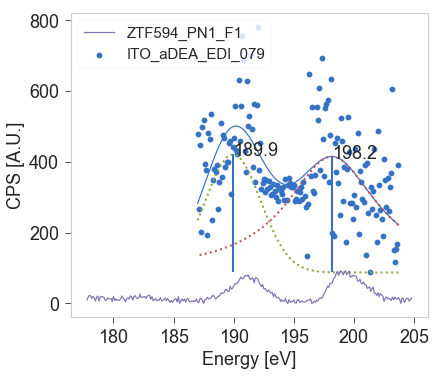

In [510]:
region = 'Br3p'
xp = crop_spectrum(ru_exps[3], region, edw=187)
manual_limit_noise(xp, region, eup=196.0, edw=192.5, ydw=200, yup=270)

Fn = XPFit(xp, region)
Fn.double_voigt(195)
plot_fit_result(xp, region)
x = xp.dfx[region].energy.dropna()
comps = xp.fit[region].eval_components(x=x)
ru_exps[3].area[region] = np.trapz(comps['v1_'], dx=x[0]-x[1], ) + np.trapz(comps['v2_'], dx=x[0]-x[1], )

plot_region(xpr, region)
# plot_region(xpg, region)

#### Case APTES > deFBI

In [517]:
na = 2
stoi_aptes_decFbi = []
for na in range(1, 5):
    area_ref_aptes_decFbi = {'C1s':17 + na*3, 'O1s': 1 + na*3, 'N1s': 2+na, 'Si2p': na, 'Br3p': 1}
    stoi_aptes_decFbi.append(XPS_experiment(name='Stoich_decFBI+'+str(na)+'APTES', area = area_ref_aptes_decFbi))

In [518]:
print('Fit-corrected Br 3p area')
num, denom = (('C1s', 'O1s', 'N1s', 'Si2p'), ('Br3p', 'Br3p', 'Br3p', 'Br3p'))
display_stoichiometry([ru_exps[3]]+stoi_aptes_decFbi,  num=num, denom=denom)

Fit-corrected Br 3p area


In [381]:
num, denom = (('C1s', 'C1s', 'O1s', 'N1s'), ('O1s', 'N1s', 'N1s', 'Si2p'))
display_stoichiometry([ru_exps[3]]+stoi_aptes_decFbi,  num=num, denom=denom)

In [520]:
num, denom = (('C1s', 'O1s', 'N1s', 'Si2p', 'C1s', 'C1s', 'O1s', 'N1s'), ('Br3p', 'Br3p', 'Br3p', 'Br3p','O1s', 'N1s', 'N1s', 'Si2p'))
make_stoichometry_table([ru_exps[3]]+stoi_aptes_decFbi,  num=num, denom=denom)

Experiment	C/Br	O/Br	N/Br	Si/Br	C/O	C/N	O/N	N/Si	
ITO_aDEA_EDI_079	38.95 	 10.28 	 6.14 	 1.13 	 3.79 	 6.35 	 1.68 	 5.42 	 
Stoich_decFBI+1APTES	20.00 	 4.00 	 3.00 	 1.00 	 5.00 	 6.67 	 1.33 	 3.00 	 
Stoich_decFBI+2APTES	23.00 	 7.00 	 4.00 	 2.00 	 3.29 	 5.75 	 1.75 	 2.00 	 
Stoich_decFBI+3APTES	26.00 	 10.00 	 5.00 	 3.00 	 2.60 	 5.20 	 2.00 	 1.67 	 
Stoich_decFBI+4APTES	29.00 	 13.00 	 6.00 	 4.00 	 2.23 	 4.83 	 2.17 	 1.50 	 


#### Case APTES < deFBI

In [516]:
stoi_aptes_decFbi = []
for na in range(1, 5):
    area_ref_aptes_decFbi = {'C1s':17 * na + 3, 'O1s': 1 * na + 3, 'N1s': 2*na + 1, 'Si2p': 1, 'Br3p': na}
    stoi_aptes_decFbi.append(XPS_experiment(name='Stoich '+str(na)+'decFBI+'+'APTES', area = area_ref_aptes_decFbi))

print('Fit-corrected Br 3p area')
num, denom = (('C1s', 'O1s', 'N1s', 'Si2p', 'N1s'), ('Br3p', 'Br3p', 'Br3p', 'Br3p', 'Si2p'))
display_stoichiometry([ru_exps[3]]+stoi_aptes_decFbi,  num=num, denom=denom)

Fit-corrected Br 3p area


In [91]:
data = [['Nominal', 'C/Br', 'O/Br', 'N/Br', 'Si/Br'], 
        ['APTES-aDEA', 17, 4, 4, 1]]
display_table(data)

## Compare N and Si to APTES only

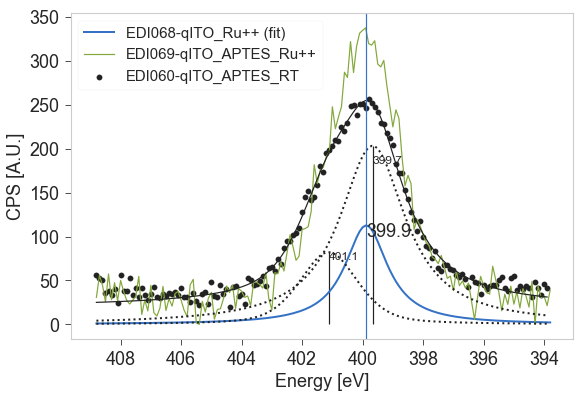

In [84]:
region = 'N1s'
plt.figure(figsize=(9,6))
fitRes = ru_exps[1].fit[region]
x = ru_exps[2].dfx[region].energy.dropna()
comps = fitRes.eval_components(x=x)
plt.plot(x, comps['v1_'], lw=2, label='EDI068-qITO_Ru++ (fit)')[0]
# for xp in ru_exps[2:]:
plot_region(ru_exps[2], 'N1s')
plot_fit_result(ru_exps[3], region)
plt.axvline(x=fitRes.best_values['v1_center'])
plt.text(x=fitRes.best_values['v1_center'], y = 100, s='%.1f'%fitRes.best_values['v1_center'])
plt.legend()
plt.gca().invert_xaxis()

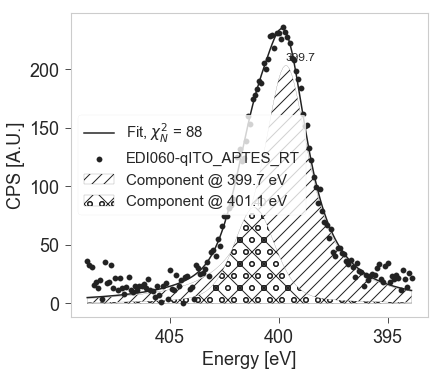

In [82]:
Fn = XPFit(ru_exps[3], region)
Fn.double_voigt(sepPt=400)
Fn.plot()

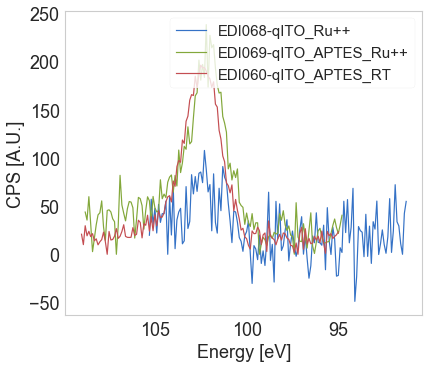

In [55]:
for xp in ru_exps[1:]:
    plot_region(xp, 'Si2p')

## Subtract clean ITO O 1s 

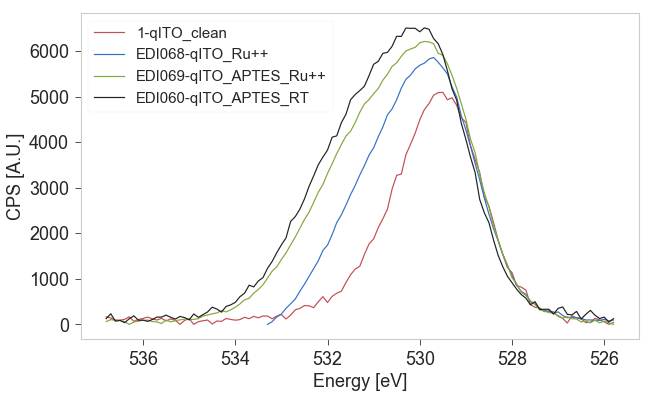

In [22]:
plt.figure(figsize=(10,6))
for xp in ru_exps:
    plot_region(xp, 'O1s')
    
plt.gca().invert_xaxis()

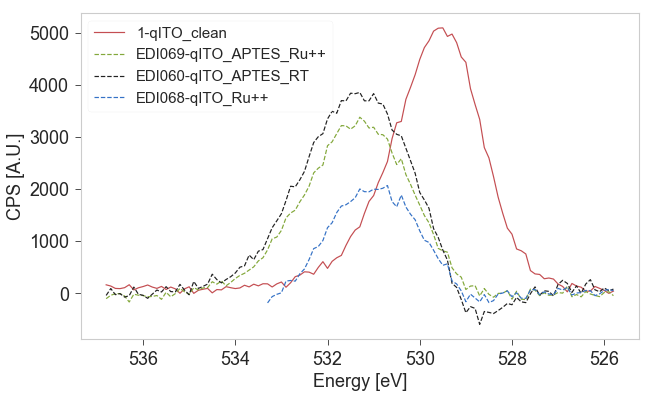

In [26]:
plt.figure(figsize=(10,6))
region = 'O1s'

for xp in ru_exps[1:]:
    xp.ls = '--'
plot_region(ru_exps[0], region)

# subtract_ref_region(ru_exps[2], ru_exps[0], 'O1s', inplace=True)
plot_region(ru_exps[2], region)

# subtract_ref_region(ru_exps[3], ru_exps[0], 'O1s', inplace=True)
plot_region(ru_exps[3], region)

# trim_spectra(ru_exps[0], ru_exps[1], region, inplace=True)
# subtract_ref_region(ru_exps[1], ru_exps[0], 'O1s', inplace=True)
plot_region(ru_exps[1], region)
plt.gca().invert_xaxis()

In [27]:
for xp in ru_exps:
    y = xp.dfx[region].dropna().counts
    x = xp.dfx[region].dropna().energy
    
    ymx = np.argmax(y)
    print(x[ymx])

529.5
530.6999999999999
531.3
531.3


## C 1s Fit and subtract APTES only

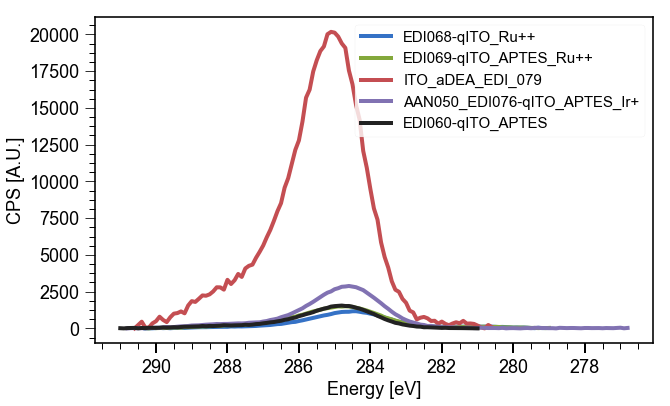

In [546]:
plt.figure(figsize=(10,6))
for xp in ru_exps[1:]:
    try:
        plot_region(xp, 'C1s')
    except KeyError:
        pass
# plt.gca().invert_xaxis()

Best chi2 value for 3 components


[4548.099191878187, 269.56342751290026, 85.70885266904186]

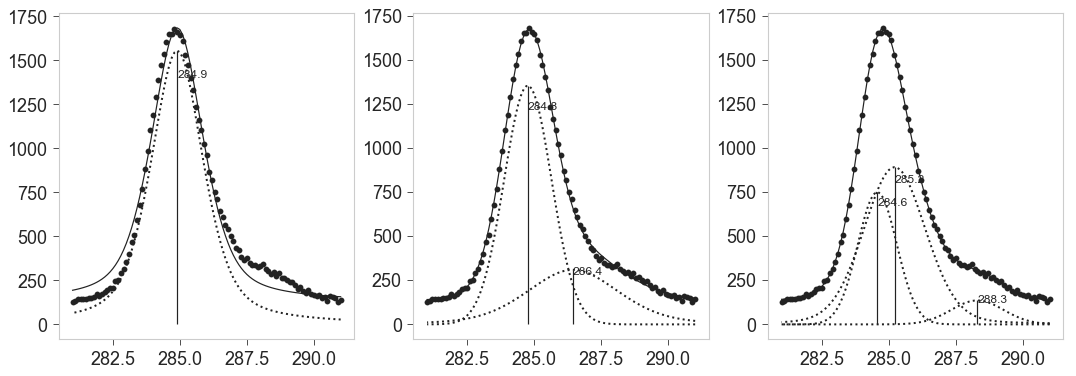

In [125]:
# Fn = XPFit(ru_exps[3], 'C1s')
fit_n_voigt(ru_exps[3], 'C1s', max_comps=3, flag_save=True)

In [126]:
ru_exps[3].fit

{'N1s': <lmfit.model.ModelResult at 0x1a1c240c50>,
 'C1s_1comps': <lmfit.model.ModelResult at 0x1a1d429668>,
 'C1s_2comps': <lmfit.model.ModelResult at 0x1a1d412a20>,
 'C1s_3comps': <lmfit.model.ModelResult at 0x1a1e1ea5f8>}

In [144]:
xpnn.dfx

C1s-v0_            C1s-v0_-v1_           
     energy     counts      energy     counts
0     290.3   2.714972       290.3   2.714966
1     290.2 -20.566565       290.2 -20.566571
2     290.1   8.950020       290.1   8.950013
3     290.0 -13.449891       290.0 -13.449898
4     289.9 -10.598577       289.9 -10.598584
..      ...        ...         ...        ...
109   279.4  32.140359       279.4  32.140351
110   279.3  18.330982       279.3  18.330974
111   279.2  27.324262       279.2  27.324255
112   279.1  18.346263       279.1  18.346256
113   279.0  30.017147       279.0  30.017141

[114 rows x 4 columns]

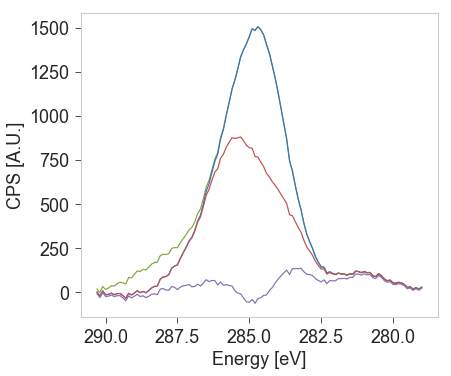

In [154]:
region = 'C1s'
plot_region(ru_exps[2], 'C1s')

xpn = subtract_fit_component(ru_exps[2], 'C1s', prefix='v0_', fitRes=ru_exps[3].fit['C1s_3comps'], flag_plot=False)
xpnn = subtract_fit_component(xpn, 'C1s-v0_', prefix='v1_', fitRes=ru_exps[3].fit['C1s_3comps'], flag_plot=False)
xpdef = subtract_fit_component(xpnn, 'C1s-v0_-v1_', prefix='v2_', fitRes=ru_exps[3].fit['C1s_3comps'], flag_plot=False)

xpn.color = 'b'
plot_region(xpn, region+'-v0_', )
plot_region(xpnn, region+'-v0_-v1_')
plot_region(xpdef, region+'-v0_-v1_-v2_')
plt.gca().invert_xaxis()
plt.gca().get_legend().remove()

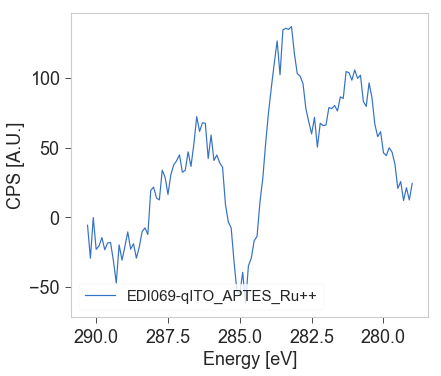

In [155]:
plot_region(xpdef, region+'-v0_-v1_-v2_')

### Compare Ru 3d to APTES C 1s

Best chi2 value for 3 components


[4547.132850025094, 269.5061529391182, 85.68945768645779]

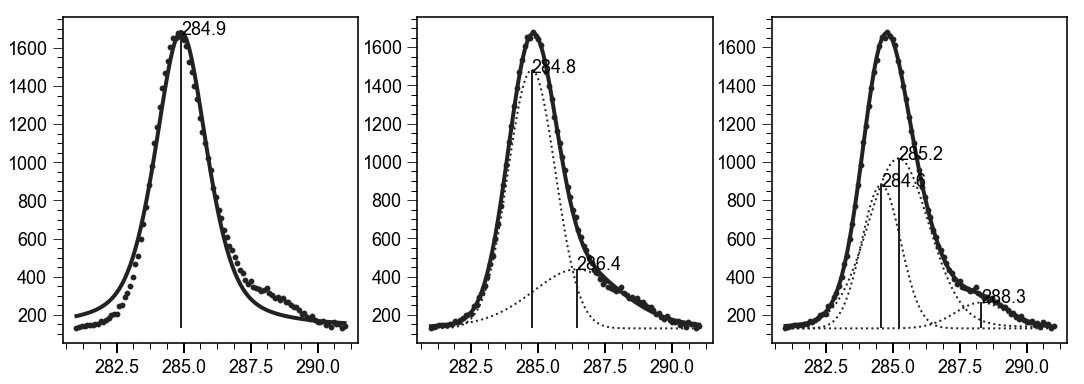

In [556]:
fit_n_voigt(ru_exps[6], 'C1s', max_comps=3, flag_save=True)

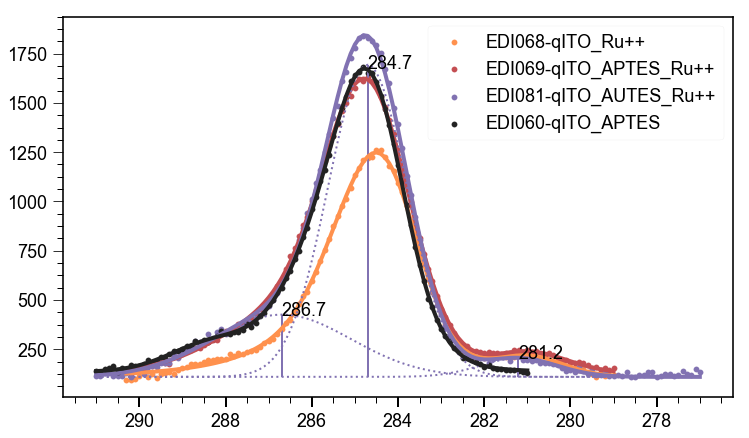

In [562]:
plt.figure(figsize=(12,7))

plot_fit_result(ru_exps[1], 'C1s', fitRes=ru_exps[1].fit['C1s_3comps'], plot_comps=False)

plot_fit_result(ru_exps[2], 'C1s', fitRes=ru_exps[2].fit['C1s_3comps'], plot_comps=False)
plot_fit_result(ru_exps[5], 'Ru3d', fitRes=ru_exps[5].fit['Ru3d_3comps'], plot_comps=True)
plot_fit_result(ru_exps[6], 'C1s', fitRes=ru_exps[6].fit['C1s_3comps'], plot_comps=False)
# plot_region(ru_exps[6], 'C1s')
plt.legend(fontsize=18)
plt.gca().invert_xaxis()

## Plot F 1s

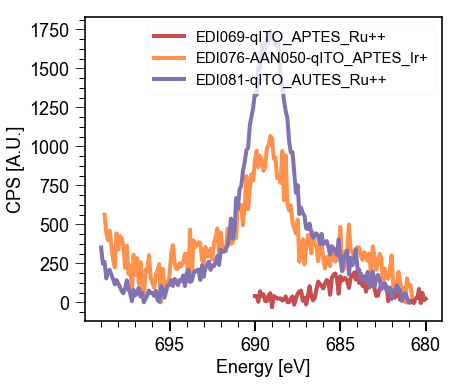

In [563]:
region = 'F1s'
for xp in ru_exps:
    try:
        plot_region(xp, region)
    except KeyError:
        pass

# Coverages

In [250]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/**/*.uxy'

files = glob.glob(path, recursive=True)
files.sort()
files.append('/Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/proc/20210427_ITO_APTES_thin.uxy')

files

['/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210415_1-qITO_clean.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI068-qITO_Ru++.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI069-qITO_APTES_Ru++.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210707_ITO_aDEA_EDI_079.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210708_AAN050_EDI076-qITO_APTES_Ir+.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210708_EDI081-qITO_APTES_Ru++.uxy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_APTES/2021_04_27_qITO/proc/20210427_ITO_APTES_thin.uxy']

In [252]:
ru_uxy = [read_processed_xp(f) for f in files]


[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210415_1-qITO_clean.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI068-qITO_Ru++.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_06_07_ITO_Ru/proc/20210607_EDI069-qITO_APTES_Ru++.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210707_ITO_aDEA_EDI_079.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210708_AAN050_EDI076-qITO_APTES_Ir+.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/2021_07_08_qITO_Ru_Ir/proc/20210708_EDI081-qITO

In [531]:
ru_uxy[6].name = 'EDI060-qITO_APTES'
ru_uxy[6].color = 'k'
shift = find_shift(ru_uxy[6], ru_uxy[2], 'In3d')
align_dfx(ru_uxy[6], shift, inplace=True);

In [387]:
ru_uxy[5].name = 'EDI081-qITO_AUTES_Ru++'

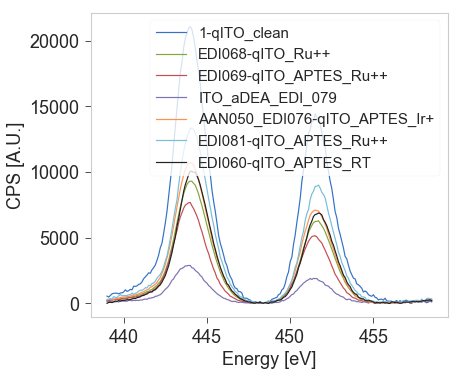

In [256]:
for xp in ru_uxy:
    trim_spectra(xp, ru_uxy[6], 'In3d', inplace=True)
    plot_region(xp, 'In3d')
    
plt.gca().invert_xaxis()

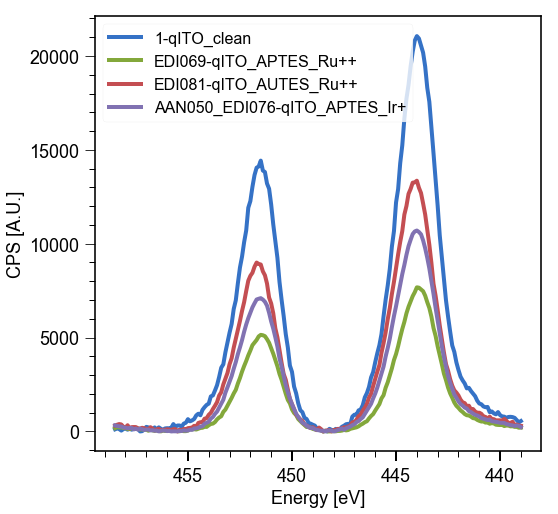

In [523]:
plt.figure(figsize=(8,8))
sel = [ru_uxy[i] for i in [0, 2, 5, 4]]
for xp in sel:
#     trim_spectra(xp, ru_uxy[6], 'In3d', inplace=True)
    plot_region(xp, 'In3d')
plt.legend(fontsize=16)
plt.gca().invert_xaxis()

In [393]:
from invisible_cities.core.system_of_units import nm

inds = [[1, 0]]
layers_ru = arrange_coverages(ru_uxy, inds,
                               r_ml = 1*nm, region='In3d', mfp = 2.83*nm, takeoff = 10)
# Estimated Ru++ fluorophore IMFP using SESSA

inds = [[2, 0]]
layers_ru_aptes = arrange_coverages(ru_uxy, inds,
                               r_ml = 1*nm, region='In3d', mfp = (2.88+2.83)/2*nm, takeoff = 10)

# Estimated Ru++ fluorophore IMFP using SESSA and summed it to the IMFP APTES 

inds = [[6, 0]]
layers_aptes = arrange_coverages(ru_uxy, inds,
                               r_ml = 1*nm, region='In3d', mfp = 2.88*nm, takeoff = 10)

# Proper EAL calculation for APTES in separate notebook 

In [275]:
from invisible_cities.core.system_of_units import nm

inds = [[4, 0]]
layers_ir_aptes = arrange_coverages(ru_uxy, inds,
                               r_ml = 1*nm, region='In3d', mfp = (2.88+2.78)/2*nm, takeoff = 10)
# Estimated Ir+ fluorophore IMFP using SESSA

inds = [[5, 0]]
layers_ru_autes = arrange_coverages(ru_uxy, inds,
                               r_ml = 1*nm, region='In3d', mfp = (2.90+2.83)/2*nm, takeoff = 10)

# Estimated Ru++ fluorophore IMFP using SESSA and summed it to the IMFP APTES 
# AUTES IMFP using TPP2M: 2.90 nm (unreacted or not)

inds = [[3, 0]]
layers_decFBI_aptes = arrange_coverages(ru_uxy, inds,
                               r_ml = 1*nm, region='In3d', mfp = (2.88+3.40)/2*nm, takeoff = 10)
# decFBI-acid IMFP  using TPP2M: 3.40 nm (reacted or not)

In [276]:
layers_ir_aptes, layers_ru_autes

(matrix([[1.88405231, 0.01594055]]), matrix([[1.30712651, 0.01507798]]))

In [277]:
layers_decFBI_aptes

matrix([[6.06534817, 0.02924539]])

#####  IMFP AUTES 2.90 nm (TPP2M)

In [394]:
layers_ru, layers_ru_aptes, layers_aptes

(matrix([[2.29153106, 0.01675166]]),
 matrix([[2.90764903, 0.01823279]]),
 matrix([[2.15782503, 0.01669116]]))

In [183]:
inds = [[2, 3]]
layers_aptes_ru = arrange_coverages(ru_uxy, inds,
                               r_ml = 1*nm, region='In3d', mfp = (3.73)*nm, takeoff = 10)

# Estimated Ru++ fluorophore IMFP using SESSA, reference to APTES sample
layers_aptes_ru

matrix([[1.13812516, 0.02739128]])

In [525]:
names = ['1-qITO_clean', 'EDI068-qITO_Ru++', 'EDI069-qITO_APTES_Ru++', 'EDI079-qITO_APTES_decFBI-acid',
 'EDI076-AAN050-qITO_APTES_Ir+', 'EDI081-qITO_AUTES_Ru++']
for xp, n in zip(ru_uxy, names):
    xp.name = n

In [541]:
ru_uxy[4].color = 'y'
ru_uxy[3].color = 'g'
ru_uxy[1].color = 'y'
ru_uxy[2].color =  'r'


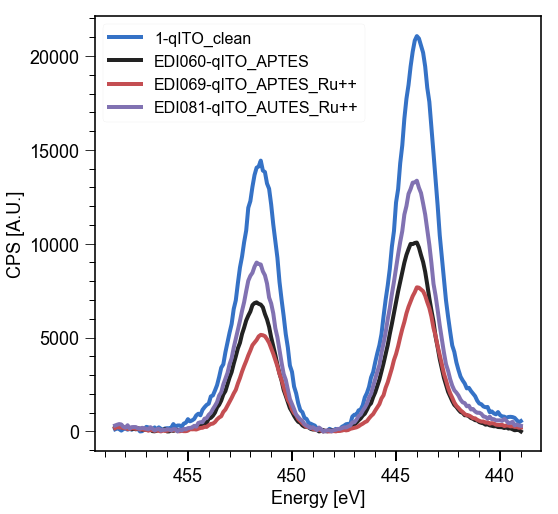

In [544]:
plt.figure(figsize=(8,8))
sel = [ru_uxy[i] for i in [0, 6, 2, 5]]
for xp in sel:
#     trim_spectra(xp, ru_uxy[6], 'In3d', inplace=True)
    plot_region(xp, 'In3d')
plt.legend(fontsize=16)
plt.gca().invert_xaxis()

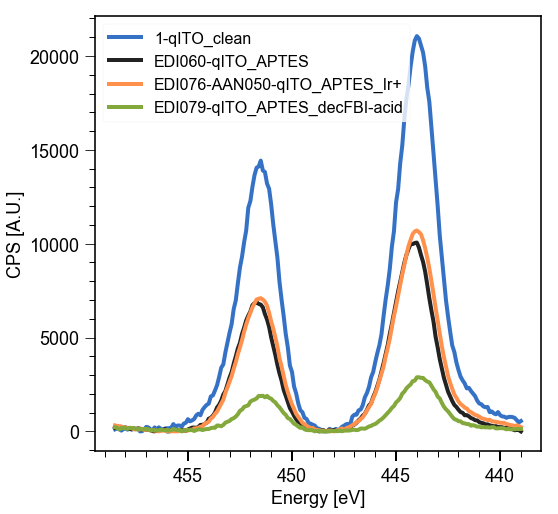

In [538]:
plt.figure(figsize=(8,8))
sel = [ru_uxy[i] for i in [0, 6, 4, 3]]
for xp in sel:
#     trim_spectra(xp, ru_uxy[6], 'In3d', inplace=True)
    plot_region(xp, 'In3d')
plt.legend(fontsize=16)
plt.gca().invert_xaxis()

### Supposing 10% APTES, 90% decFBI-acid

In [282]:
inds = [[3, 0]]
arrange_coverages(ru_uxy, inds, r_ml = 1*nm, region='In3d', mfp = (2.88*0.01+3.40*0.99)*nm, takeoff = 10)
# decFBI-acid IMFP  using TPP2M: 3.40 nm (reacted or not)

matrix([[6.55752993, 0.03161855]])

In [281]:
(2.88*0.01+3.40*0.99), (2.88+3.40)/2

(3.3948, 3.1399999999999997)

In [283]:
inds = [[3, 6]]
arrange_coverages(ru_uxy, inds, r_ml = 1*nm, region='In3d', mfp = 3.40*nm, takeoff = 10)
# decFBI-acid IMFP  using TPP2M: 3.40 nm (reacted or not)

matrix([[4.02014212, 0.0338196 ]])

# Tectomer sample

In [6]:
tecfile = '/Users/pabloherrero/sabat/xps_spectra/ITO_Ru-Ir/20210708_ITO_tectomer.xy'
tecraw = xps_data_import(tecfile)

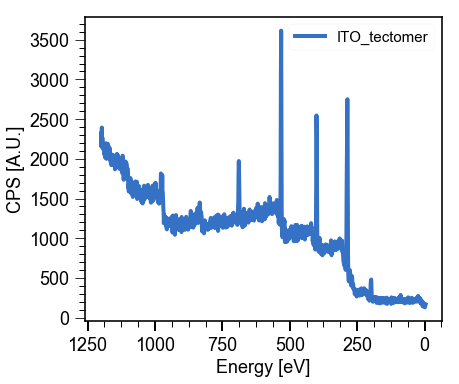

In [19]:
plot_region(tecraw, 'overview')

[(100, 300), (120, 85), Text(0.5, 1.0, 'Si2p')]

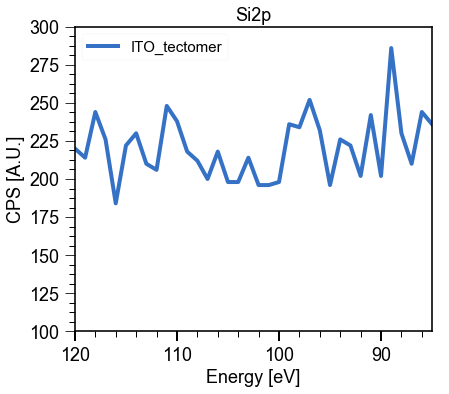

In [25]:
plot_region(tecraw, 'overview')
plt.gca().set(xlim=(120, 85), ylim=(100,300), title='Si2p')

In [11]:
tecraw.dfx.columns.levels[0]

Index(['C1s', 'C1s_(2)', 'Cl2p', 'F1s', 'In3d', 'La3d', 'N1s', 'O1s',
       'overview'],
      dtype='object', name='range')

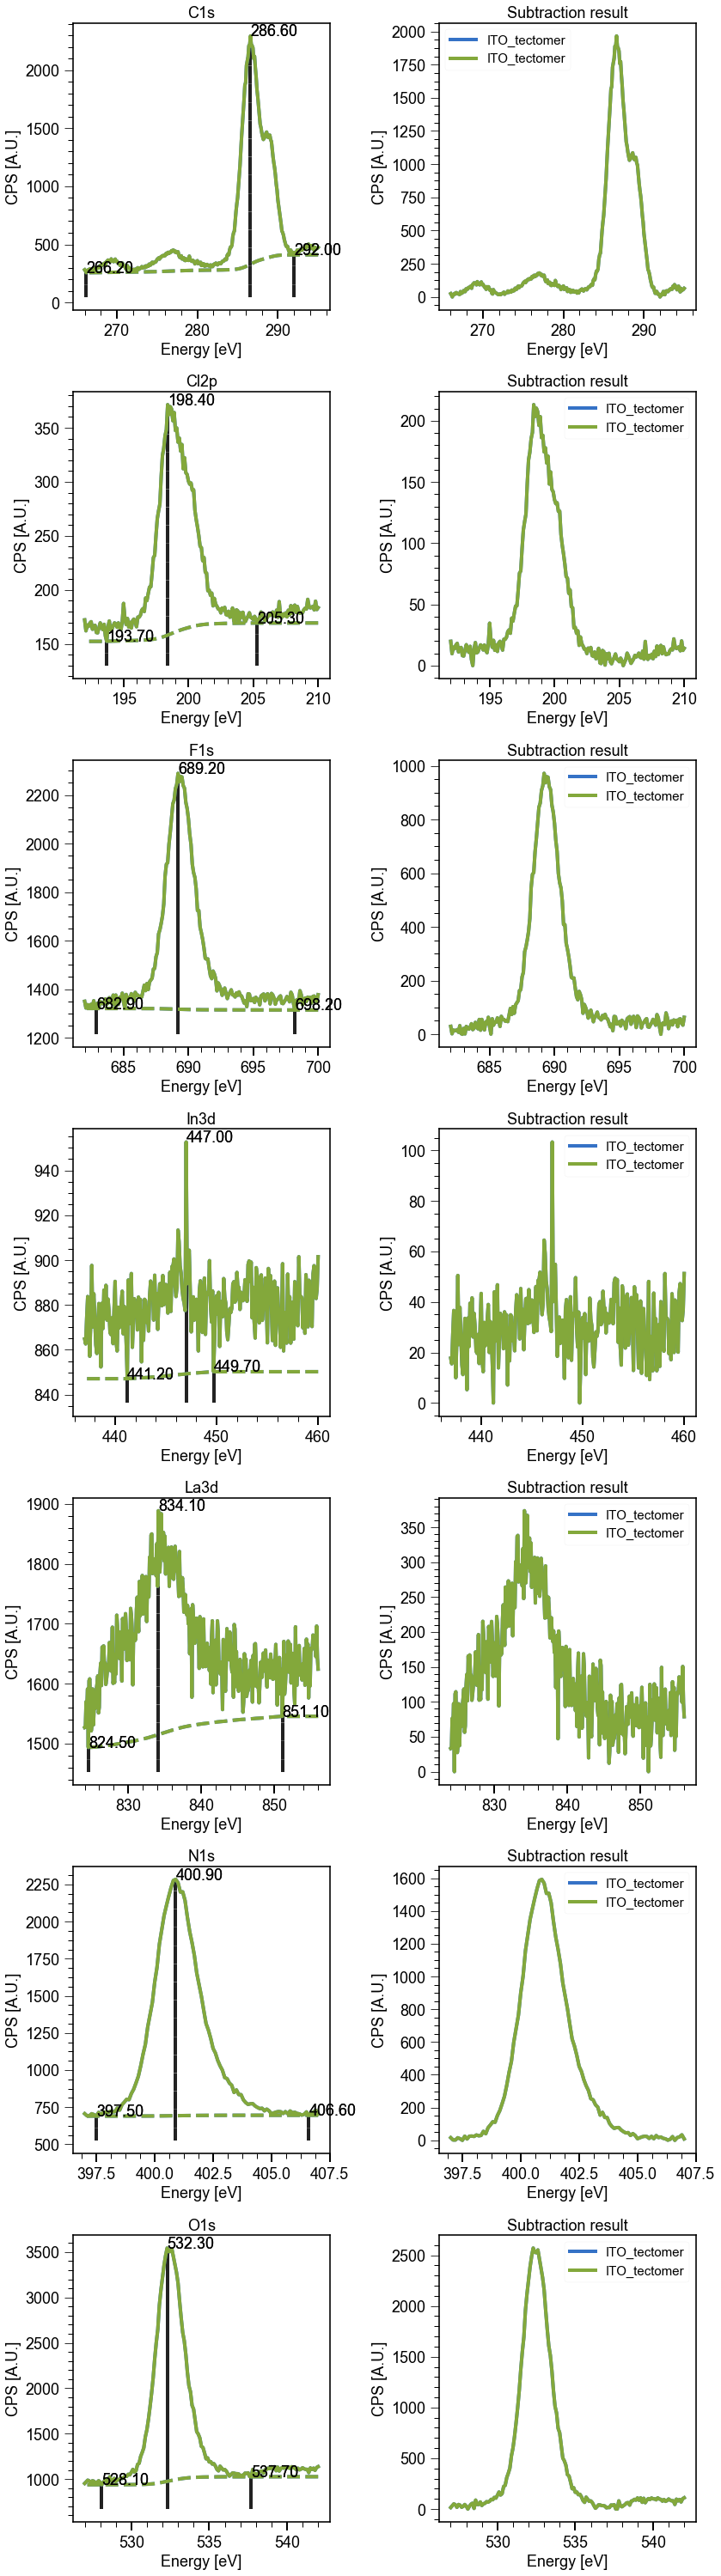

In [52]:
regions = ['C1s', 'Cl2p', 'F1s', 'In3d', 'La3d', 'N1s', 'O1s']
tecbg, _ = bulk_bg_subtract([tecraw, tecraw], regions)

In [15]:
tecbg.area = {}

'La3d' , asf missing, returning raw area
'La3d' , asf missing, returning raw area


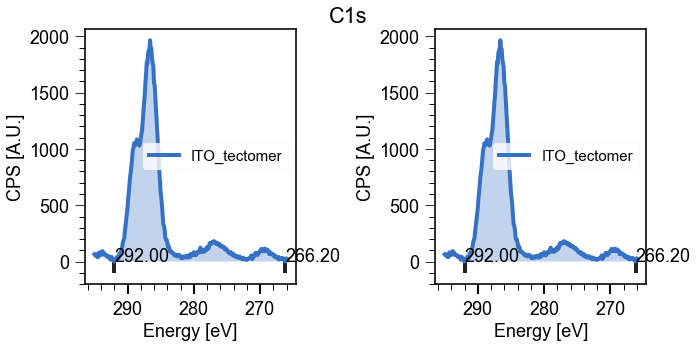

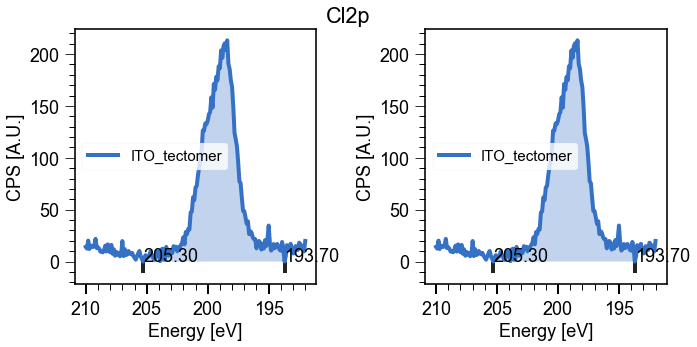

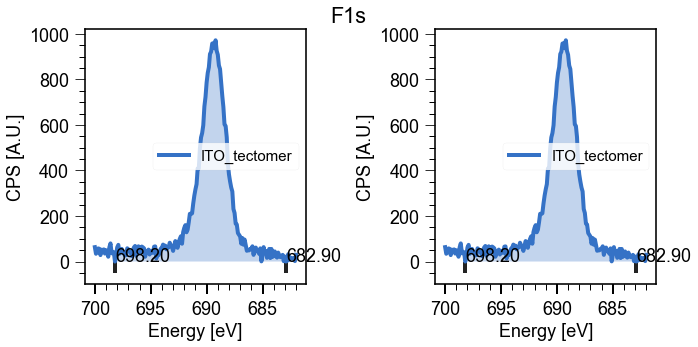

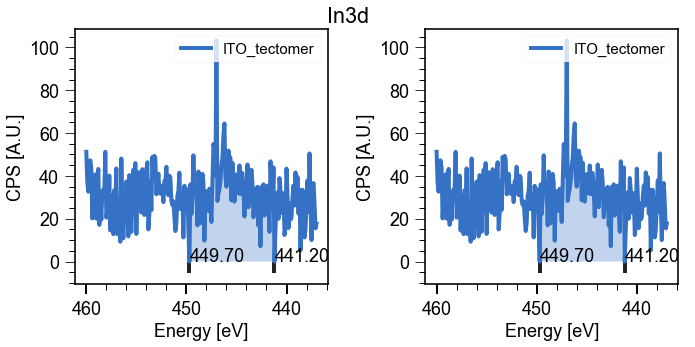

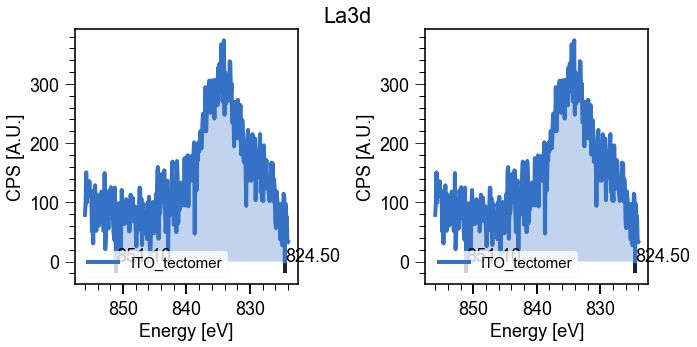

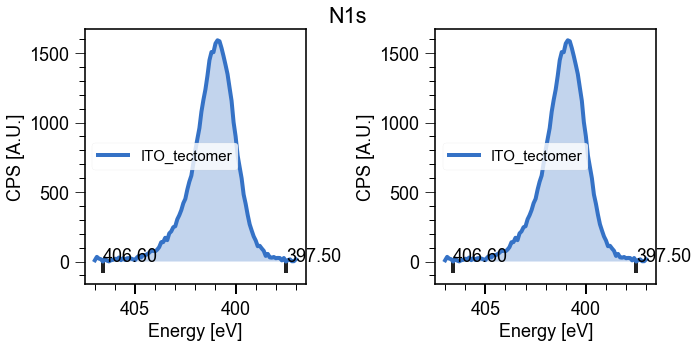

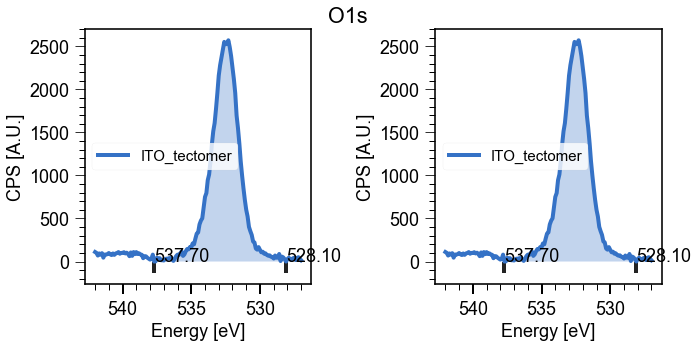

In [16]:
for r in regions:
    integrateRegions([tecbg, tecbg], r, asf)

In [53]:
shift = find_shift(tecbg, ru_exps[2], 'C1s')
align_dfx(tecbg, shift, inplace=True);

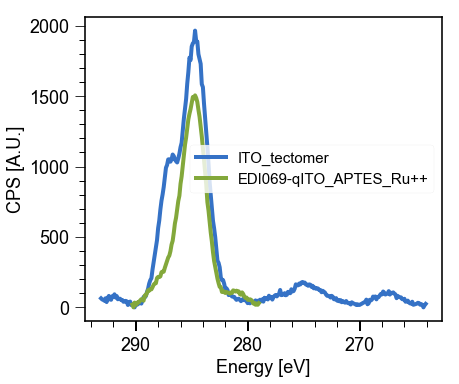

In [56]:
plot_region(tecbg, 'C1s')
plot_region(ru_exps[2], 'C1s')
plt.gca().invert_xaxis()

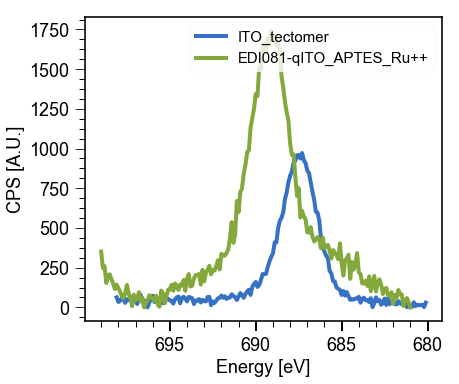

In [57]:
plot_region(tecbg, 'F1s')
plot_region(ru_exps[5], 'F1s')
plt.gca().invert_xaxis()

## Stoichiometry

##### Stoichiometry tectomer (2-tailed oligoglycine)

C8H16(-CH2-NH-(C2H5NO2)5)2 * 2 HCl

In [29]:
astotec = {'C1s': 8+(1+2*5)*2, 'O1s': 2*5*2, 'N1s': (1+5)*2, 'F1s':1e-5, 'Cl2p': 2}

stotec = XPS_experiment(name='Stoichiometry Tec2', area=astotec)

##### Stoichiometry pure Ru(bpy)3

In [41]:
area_ref_ru = {'C1s':32, 'O1s': 4, 'N1s': 6, 'Ru3d': 1, 'P2p': 2, 'F1s': 12, 'Cl2p':1e-5}
stoi_ru = XPS_experiment(name='Stoich_Ru(bpy)3++[PF6]-', area = area_ref_ru)

In [42]:
num = ['C1s', 'O1s', 'N1s', 'F1s']
denom = ['Cl2p', 'Cl2p', 'Cl2p', 'Cl2p']
display_stoichiometry([tecbg, stotec, stoi_ru], num, denom)

In [51]:
stoi_tec_ru = []
for na in range(1, 3):
    area_ref_tec_ru = {'C1s':32 + na*astotec['C1s'], 'O1s': 4 + na*astotec['O1s'], 'N1s': 6+astotec['N1s'], 'Ru3d': 1, 'P2p': 2, 'F1s': 12, 'Cl2p':na*2}
    stoi_tec_ru.append(XPS_experiment(name='Stoich_Ru++:'+str(na)+'Tec2', area = area_ref_tec_ru))

num = ['C1s', 'O1s', 'N1s', 'F1s', 'O1s', 'C1s', 'N1s']
denom = ['Cl2p', 'Cl2p', 'Cl2p', 'Cl2p', 'N1s', 'N1s', 'F1s']
display_stoichiometry([tecbg, stotec, stoi_ru]+stoi_tec_ru,  num=num, denom=denom)